# Clone Exploratory Data Analysis with Titanic dataset


### Explore the survival info contained in the dataset

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.show()

In [330]:
train_data=pd.read_csv('train.csv')

test_data=pd.read_csv('test.csv')

In [331]:
train_data.shape

(891, 12)

In [332]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [333]:
#test_data.shape

In [334]:
train_data.shape

(891, 12)

In [335]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [336]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we can see, the Age and Cabin features have null values. However, we can't drop these columns because that might affect the result of the analysis.

For because the Age feature is a float dtype, we are going to fillna with mode of the column.

In [337]:
# Fillna with mode of the dataset

train_data['Age']= train_data['Age'].fillna(train_data['Age'].mode()[0])

In [338]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So, because the Cabin feature isn't an int dtype, we can't fill it with anything.

Chances are that the cabin feature may not correlate perfectly with survived feature (which is the main info in the dataset)

In [339]:
# Let's see how correlated the features are to the survived feature.

# Using heatmap

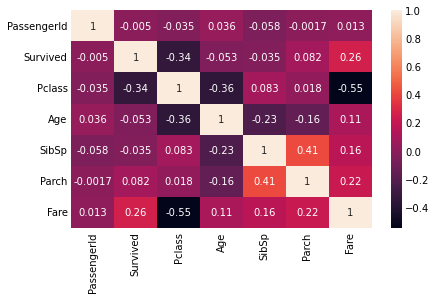

In [340]:
# Increase fig sizes

# plt.rcParams['figure.figsize']= (8, 6)

#plotting heatmap

sns.heatmap(train_data.corr(), annot= True)

plt.show()

Now, we can clearly see how each of the features correlate. Positive correction between two features means that the both features have a direct relationship i.e as one of the feature is increasing, the other is also increasing. The reverse is the case for negative correlation.

The heatmap here shows a positive correlation between the 'Survived' feature and 'Parch' and 'Fare' features. Also, the heatmap here shows a negative correlation between the 'Survived' feature and 'Pclass', 'SibSp', and 'Age' features.S

In [341]:
# Lets drop some features we won't be using.

train_data= train_data.drop(columns= ['PassengerId', 'Ticket','Embarked', 'Cabin'])

###### Let's do some important visualizations

In [342]:
train_data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833


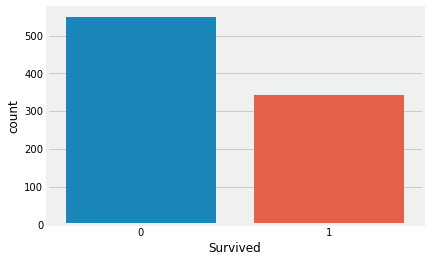

In [343]:
sns.countplot('Survived', 
              data= train_data)
plt.show()

In [344]:
survival_by_sex= train_data.groupby(['Survived'])['Sex'].size().reset_index()

In [345]:
survival_by_sex

,Survived,Sex
0,0,549
1,1,342


In [346]:
'''

Let's make a pie chart to visualize the percentage of survival.

Note:   0 = Death
        1 = Alive
'''

x= survival_by_sex.Sex.value_counts().index

y= survival_by_sex.Survived.value_counts().index

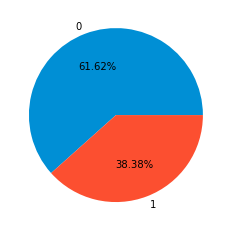

In [347]:
plt.pie(x=x, labels= y, data= train_data, autopct= '%1.2f%%')

plt.show()



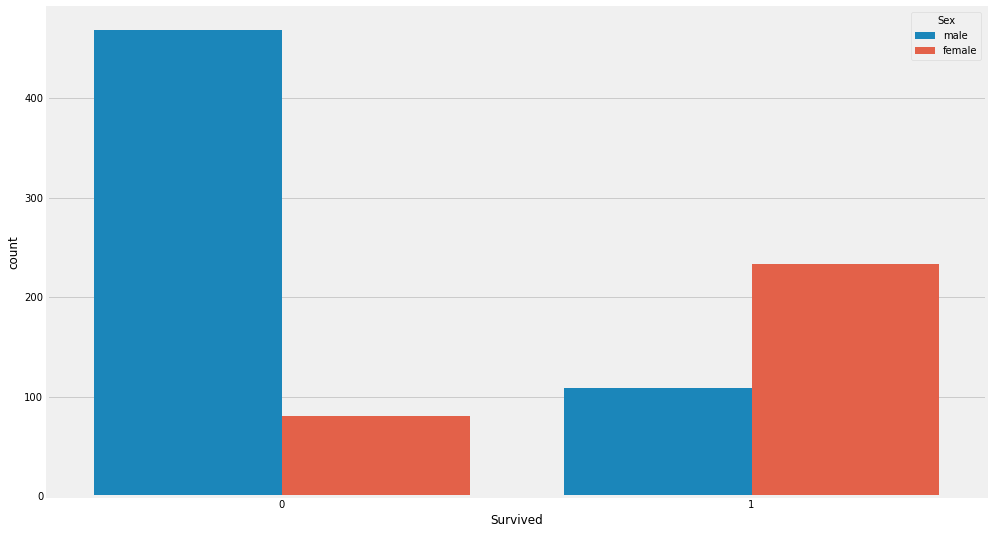

<Figure size 1080x648 with 0 Axes>

In [360]:
# Let's visualize the survival by sex

ax= sns.countplot('Survived', 
              hue= 'Sex',
              data= train_data)

# plt.title('Survival vs Sex')

plt.show()

plt.savefig("ax.png")

##### Key Observation:

The barplot shows that the number of death cases are more than the survived cases in general.

The pie plot then shows that 38.38% (342) and 61.62% (550) of the passsengers survived and died, respectively.

Note:   0 = Death
        1 = Alive

#### Survival by Passenger Class

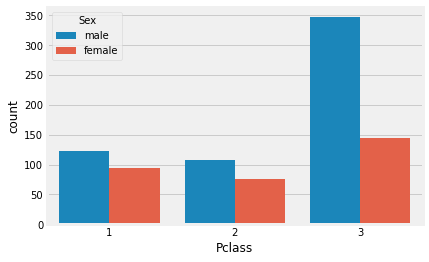

In [349]:
sns.countplot('Pclass', hue= 'Sex', data= train_data)


# plt.title('Pclass vs Survival')
plt.show()

This plot shows that regardless of class, the male are more than the female

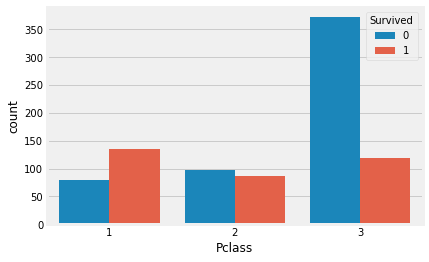

In [350]:
sns.countplot('Pclass', hue= 'Survived', data= train_data)

# plt.title('Pclass vs Survival')
plt.show()

The plot shows that the 3rd class passengers suffered the most death. It also shows that priority was given to 1st class passengers during the rescue operations

#### Passengers' Age

In [351]:
train_data['Age']= train_data['Age'].astype(int)


max_age= train_data.Age.max()

min_age= train_data.Age.round(1).min()

print('Max age:', max_age, '\nMin age:', min_age)

Max age: 80 
Min age: 0


In [352]:
plt.rcParams['figure.figsize']= (15, 9)


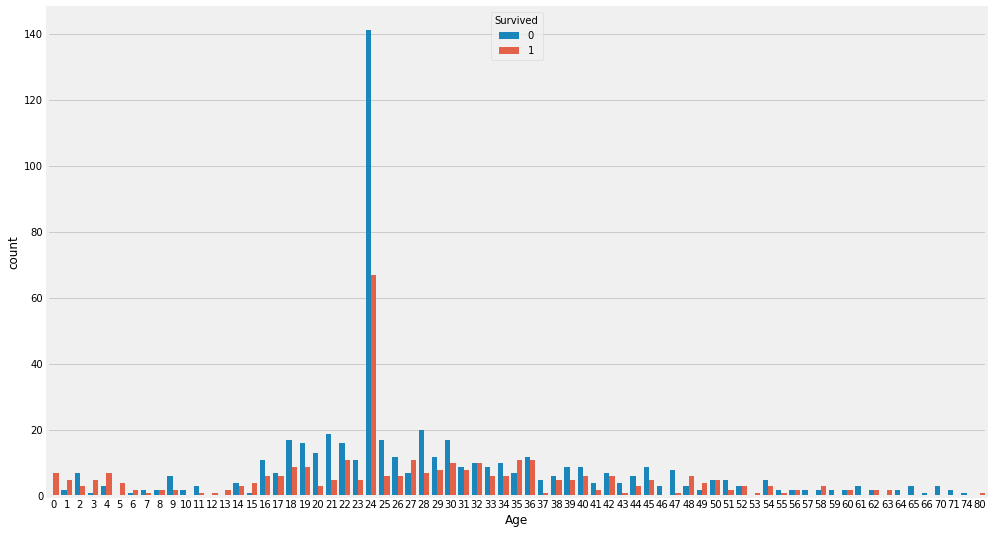

In [353]:
sns.countplot('Age', hue= 'Survived', data= train_data)

plt.show()

Most death and survival was between the age range of 16yrs and 51yrs. The oldest rescued person was 80yrs old while the youngest survivor was less than a yeay old.

#### Survivial by SibSP

In [354]:
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250


In [355]:
# train_data['SibSp'].value_counts().groupby('Survived')

In [356]:
sib= train_data.groupby(['SibSp','Survived']).size().reset_index().rename(columns= {0:'Counts'})

sib

,SibSp,Survived,Counts
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


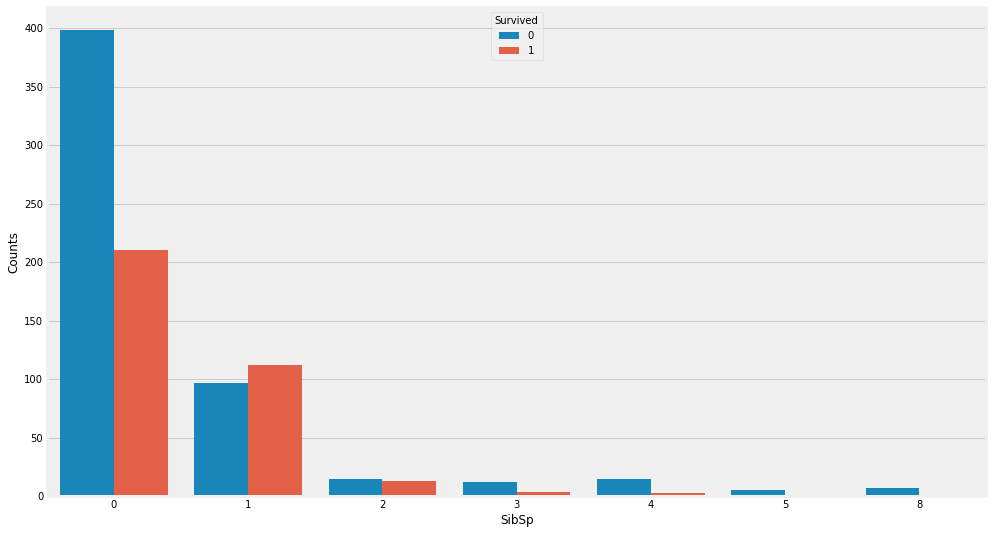

In [357]:
sns.barplot(x= 'SibSp', y= 'Counts', hue= 'Survived', data= sib)

plt.show()

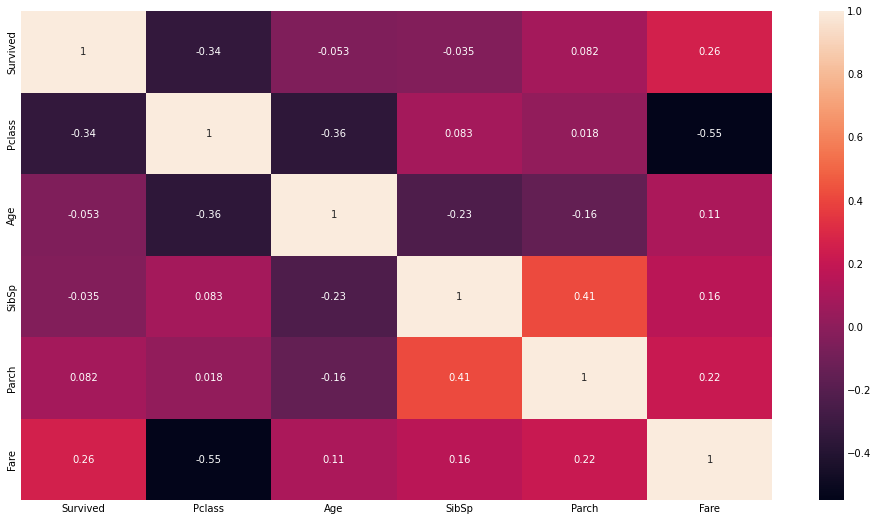

<Figure size 1080x648 with 0 Axes>

In [361]:
ax1= sns.heatmap(train_data.corr(), annot= True)

plt.show()

plt.savefig("ax1.png")

#####  Key Observation: 

The barchart shows that the passengers with no siblings, parents or pathners had the highest survival. 

The interesting here is that, as the number of  siblings, parents or pathners decreases, the number of survival increses. 

Therefore, there is an inverse relationship between the SibSp and Survived features.

This is so evident by the heatmap that shows a negative correlation value of -0.035 between the SibSp and the Survived features.

In [359]:
train_data[train_data['Fare']==512.3292].style.background_gradient(cmap='summer_r')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
258,1,1,"Ward, Miss. Anna",female,35,0,0,512.329200
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,512.329200
737,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,512.329200


Passengers with that paid the highest Fare are in the 1st class category.

In [ ]:
Pclass = data.groupby(data['Pclass'])['Pclass'].count()
sns.factorplot('Pclass', data=data, kind='count', aspect=1)
plt.xlabel('class')
plt.title('Classes')